Assignment 2

For this assignment, we are going to choose a dataset and create a predictive model.
I've chosen the fifa 18 dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("CompleteDataset.csv")
df1.head()

C:\Users\beneb\AppData\Local\Temp\ipykernel_13424\498184078.py:4: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("CompleteDataset.csv")


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's clean the dataset. I'll try to keep only the columns that can help decide a player's position. I couldn't get only the first item of preferred position with df1["Preferred Positions"].split(" ", 1)

In [19]:
df = df1[
    ["Preferred Positions", "Name", "Overall", "Acceleration", "Dribbling", "Finishing", "LF", "RF", "Marking",
     "GK handling"]]
# Replacing NaN values by 0
df = df.fillna(0)
df

,Preferred Positions,Name,Overall,Acceleration,Dribbling,Finishing,LF,RF,Marking,GK handling
0,ST LW,Cristiano Ronaldo,94,89,91,94,91.0,91.0,22,11
1,RW,L. Messi,93,92,97,95,92.0,92.0,13,11
2,LW,Neymar,92,94,96,89,88.0,88.0,21,9
3,ST,L. Suárez,92,88,86,94,88.0,88.0,30,25
4,GK,M. Neuer,92,58,30,13,0.0,0.0,10,90
...,...,...,...,...,...,...,...,...,...,...
17976,GK,A. Kelsey,46,24,12,5,0.0,0.0,9,47
17977,GK,B. Richardson,46,25,11,11,0.0,0.0,14,50
17978,ST,J. Young,46,66,37,47,45.0,45.0,18,15
17979,CM,J. Lundstram,46,57,41,32,43.0,43.0,43,13


Now let's try to find out what can impact a player's preferred position. Generally, if a player has a good finishing, he'd prefer to be a striker.

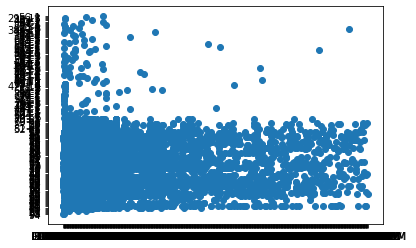

In [20]:
plt.scatter(df["Preferred Positions"], df["Finishing"])

In [21]:
dummy = pd.get_dummies(df["Preferred Positions"])
dfM = pd.concat([df, dummy], axis=1)
dfM

,Preferred Positions,Name,Overall,Acceleration,Dribbling,Finishing,LF,RF,Marking,GK handling,...,ST RM CF,ST RM LM,ST RM LM CAM,ST RM LW,ST RM RB,ST RM RW,ST RW,ST RW CAM,ST RW LW,ST RW RM
0,ST LW,Cristiano Ronaldo,94,89,91,94,91.0,91.0,22,11,...,0,0,0,0,0,0,0,0,0,0
1,RW,L. Messi,93,92,97,95,92.0,92.0,13,11,...,0,0,0,0,0,0,0,0,0,0
2,LW,Neymar,92,94,96,89,88.0,88.0,21,9,...,0,0,0,0,0,0,0,0,0,0
3,ST,L. Suárez,92,88,86,94,88.0,88.0,30,25,...,0,0,0,0,0,0,0,0,0,0
4,GK,M. Neuer,92,58,30,13,0.0,0.0,10,90,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17976,GK,A. Kelsey,46,24,12,5,0.0,0.0,9,47,...,0,0,0,0,0,0,0,0,0,0
17977,GK,B. Richardson,46,25,11,11,0.0,0.0,14,50,...,0,0,0,0,0,0,0,0,0,0
17978,ST,J. Young,46,66,37,47,45.0,45.0,18,15,...,0,0,0,0,0,0,0,0,0,0
17979,CM,J. Lundstram,46,57,41,32,43.0,43.0,43,13,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split #We need this to split the data

X = df.loc[:, "Overall":"ST RW RM":1]  #create the X matrix
X = normalize(X)  #normalize the matrix to put everything on the same scale
y = df["Post"]  #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)  #split the data, store it into different variables

KeyError: 'ST RW RM'

In [24]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=3) #create a KNN-classifier with 3 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

NameError: name 'X_train' is not defined

For the prediction model I've decided to use the knn.It is a machine learning algorithm which uses data with several classes to predict the classification of the new sample point.